# Ejemplo de red neuronal convolucional con el dataset fashion_mnist

## 1. Importación de librerías

In [332]:
from keras.datasets import fashion_mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, Input
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## 2. Creación de dataframe y partición en train y test

Cargamos el dataset de ejemplo y lo dividimos en train y test

In [333]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [334]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [335]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

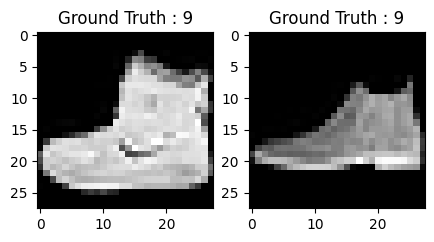

In [336]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


## 3. Ingeniería de características aplicada a redes convolucionales

In [337]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [338]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.


In [339]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [340]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [341]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [342]:
batch_size = 64
epochs = 20
num_classes = 10

Creamos el modelo a entrenar

In [343]:
fashion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28,28,1), padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2), padding='same'),

    Conv2D(64, (3, 3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(128, (3, 3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Flatten(),
    Dense(128, activation='linear'),
    LeakyReLU(alpha=0.1),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [344]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_48 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_49 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_50 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_25 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_51 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [345]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7564 - loss: 0.6688 - val_accuracy: 0.8859 - val_loss: 0.3146
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8961 - loss: 0.2889 - val_accuracy: 0.8933 - val_loss: 0.2937
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9112 - loss: 0.2423 - val_accuracy: 0.9085 - val_loss: 0.2508
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9220 - loss: 0.2147 - val_accuracy: 0.9127 - val_loss: 0.2473
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9330 - loss: 0.1850 - val_accuracy: 0.9129 - val_loss: 0.2438
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.1659 - val_accuracy: 0.9198 - val_loss: 0.2265
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9493 - loss: 0.1399 - val_accuracy: 0.9173 - val_loss: 0.2378
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9547 - loss: 0.1220 - val_accuracy: 0.

In [346]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.4183208644390106
Test accuracy: 0.9186000227928162


## 5. Visualización de métricas

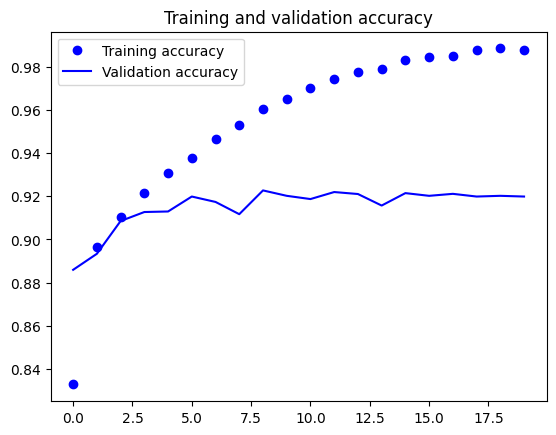

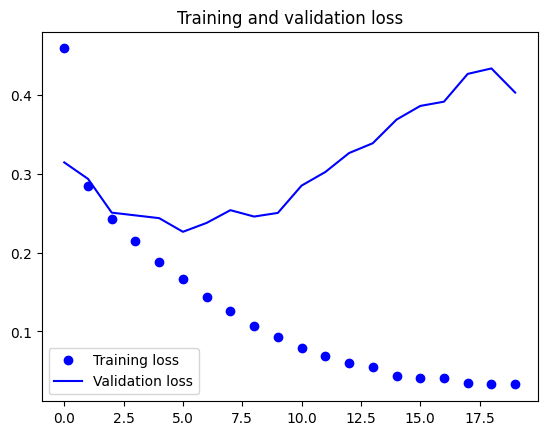

In [347]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [348]:
fashion_model = Sequential([
    #Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(28, 28, 1)),
    #LeakyReLU(alpha=0.1),
    #MaxPooling2D((2, 2), padding='same'),
    #Dropout(0.25),

    #Conv2D(64, (3, 3), activation='linear', padding='same'),
    #LeakyReLU(alpha=0.1),
    #MaxPooling2D(pool_size=(2, 2), padding='same'),
    #Dropout(0.25),

    #Conv2D(128, (3, 3), activation='linear', padding='same'),
    #LeakyReLU(alpha=0.1),
    #MaxPooling2D(pool_size=(2, 2), padding='same'),
    #Dropout(0.4),

    #Flatten(),
    #Dense(128, activation='linear'),
    #LeakyReLU(alpha=0.1),
    #Dropout(0.3),

    #Dense(num_classes, activation='softmax')


    Input(shape=(28, 28, 1)),
    
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),  # Normalización después de la convolución
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Mostrar resumen del modelo
fashion_model.summary()

# Compilar el modelo
fashion_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Reducir LR puede mejorar F1-score
    metrics=['accuracy']
)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [349]:
num_classes = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = fashion_model.fit(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=30,  # Más épocas
    batch_size=16,
    callbacks=[early_stopping]
)

Epoch 1/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8199 - loss: 0.5138 - val_accuracy: 0.8963 - val_loss: 0.2939
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9046 - loss: 0.2593 - val_accuracy: 0.9083 - val_loss: 0.2470
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9202 - loss: 0.2146 - val_accuracy: 0.9106 - val_loss: 0.2412
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9336 - loss: 0.1758 - val_accuracy: 0.9089 - val_loss: 0.2617
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9450 - loss: 0.1513 - val_accuracy: 0.9176 - val_loss: 0.2395
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9519 - loss: 0.1274 - val_accuracy: 0.9237 - val_loss: 0.2552
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9602 - loss: 0.1091 - val_accuracy: 0.9214 - val_loss: 0.2537
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9662 - loss: 0.0905 -

In [350]:
fashion_model.save("./fashion_model_dropout.h5")

In [351]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9108 - loss: 0.2660
Test loss: 0.2593162953853607
Test accuracy: 0.9126999974250793


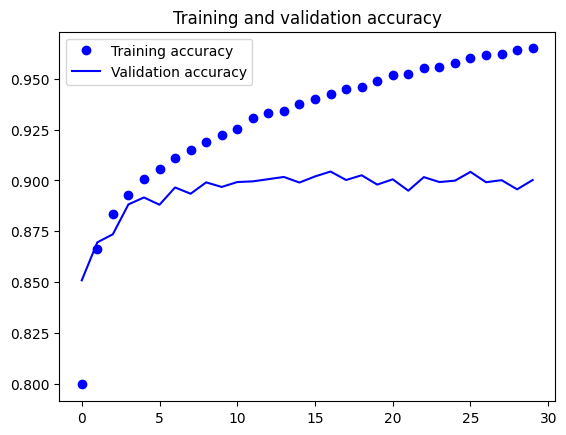

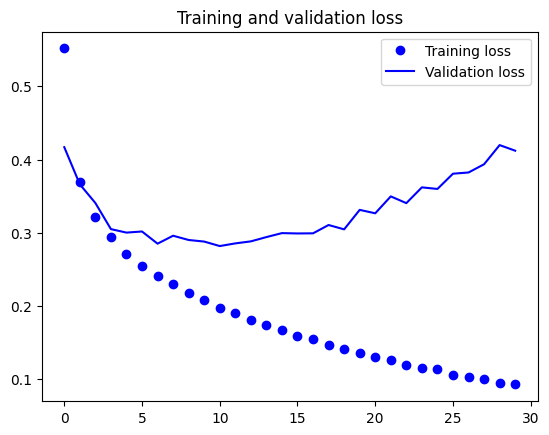

In [352]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## 6. Validación del modelo

In [353]:
predicted_classes = fashion_model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [354]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [355]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9088 correct labels


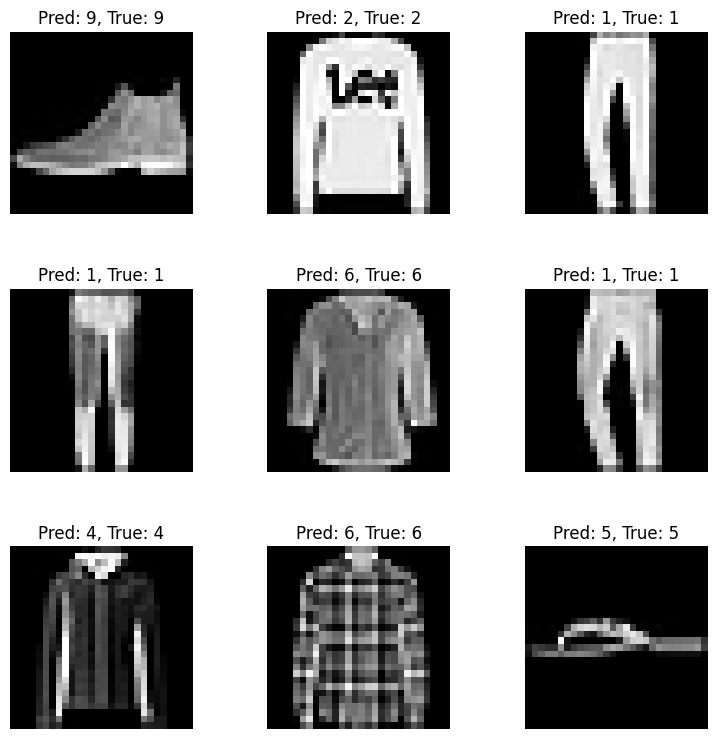

In [356]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
# Crear figura con subgráficos
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # 3x3 grid
fig.tight_layout(pad=2.0)  # Espaciado entre subplots

# Graficar las primeras 9 predicciones correctas
for i, correct_idx in enumerate(correct[:9]):
    row, col = divmod(i, 3)  # Obtener posición en la cuadrícula
    ax = axes[row, col]
    
    ax.imshow(test_X[correct_idx].reshape(28, 28), cmap='gray', interpolation='none')
    ax.set_title(f"Pred: {predicted_classes[correct_idx]}, True: {test_Y[correct_idx]}")
    ax.axis("off")  # Ocultar ejes

plt.show()  # Mostrar la figura

Found 912 incorrect labels


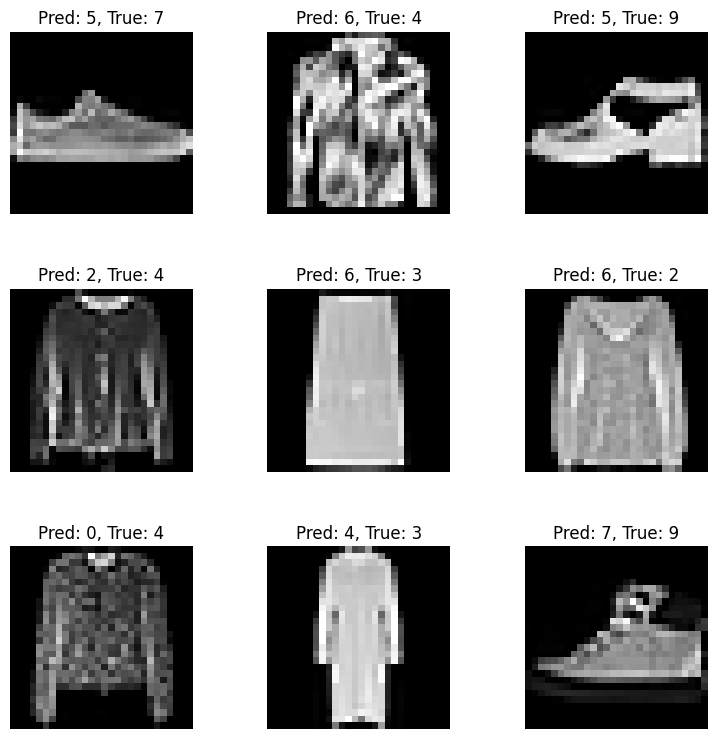

In [357]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
# Crear figura con subgráficos
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # 3x3 grid
fig.tight_layout(pad=2.0)  # Espaciado entre subplots

# Graficar las primeras 9 predicciones incorrectas
for i, incorrect_idx in enumerate(incorrect[:9]):
    row, col = divmod(i, 3)  # Obtener posición en la cuadrícula
    ax = axes[row, col]
    
    ax.imshow(test_X[incorrect_idx].reshape(28, 28), cmap='gray', interpolation='none')
    ax.set_title(f"Pred: {predicted_classes[incorrect_idx]}, True: {test_Y[incorrect_idx]}")
    ax.axis("off")  # Ocultar ejes innecesarios

plt.show()  # Mostrar la figura

In [358]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.80      0.86      0.82      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.92      0.81      0.86      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.91      0.82      0.86      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.72      0.80      0.76      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.97      0.99      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



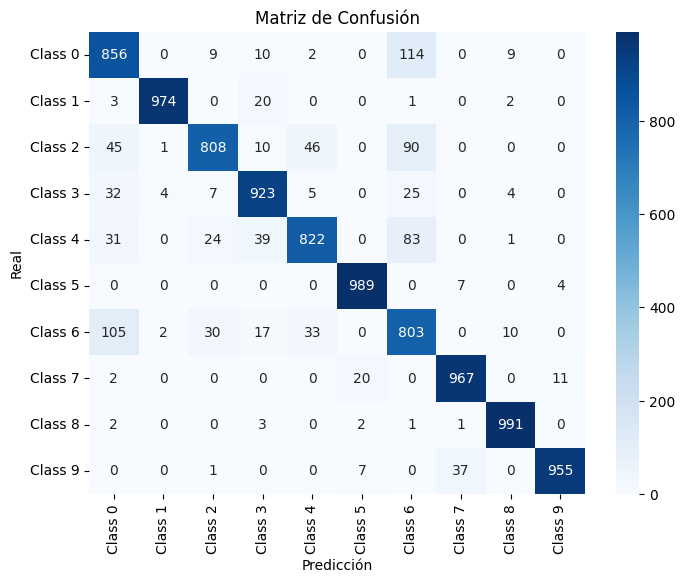

In [359]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(test_Y, predicted_classes)

# Etiquetas correctas para las 10 clases
labels = ["Class {}".format(i) for i in range(num_classes)]

# Mostrar matriz de confusión con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()